# Final Project: Analysis of Two Museum Datasets

Name(NetID): Jenna Kim(jkim682) | Yingying Han(yh17) | Xinyu Huang(xinyuh10) 



## Data

We used three different datasets:

1) Two meseum datasets: Metropolitan & Indianapolis  
2) World Bank dataset:  
3) Ethnicity dataset:


## Data Preprocessing

1) We integrated two meseum datasets  
2) We merged two World bank datasets   
3) We merged two ethnicity datasets

## Load Data

#### Note: I integrated three .py scripts we had created for collecting data. Please see "museum_data.py" file.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

file1 = "museum.csv"
file2 = "world_bank.csv"
file3 = "ethnicity.csv"
    
museum_df = pd.read_csv(file1, index_col=False, low_memory=False)
population_df = pd.read_csv(file2, index_col=False, low_memory=False)
ethnicity_df = pd.read_csv(file3, index_col=False, low_memory=False)

In [62]:
museum_df.tail()
museum_df.shape   # (485632, 15)

# population_df.head()
population_df.shape   # (263, 5)

# ethnicity_df.head()
ethnicity_df.shape   # (109, 2)

(133, 3)

## Analysis 1 : Distribution of artifacts by geographical information

### Within USA (By States)

In [33]:
museum_df_us = museum_df[museum_df['Country 1']=='United States']
museum_df_us.loc[:,('State 1')] = museum_df_us['State 1'].fillna('N/A')

C:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False).head(10)

State 1
N/A                 17784
Indiana               840
New York               80
California             72
New Mexico             59
Queens                 49
Pennsylvania           44
Massachusetts          43
Brooklyn               35
Lancaster County       33
dtype: int64

We exclude the objects from Indinan, because the museum is located in Indiana

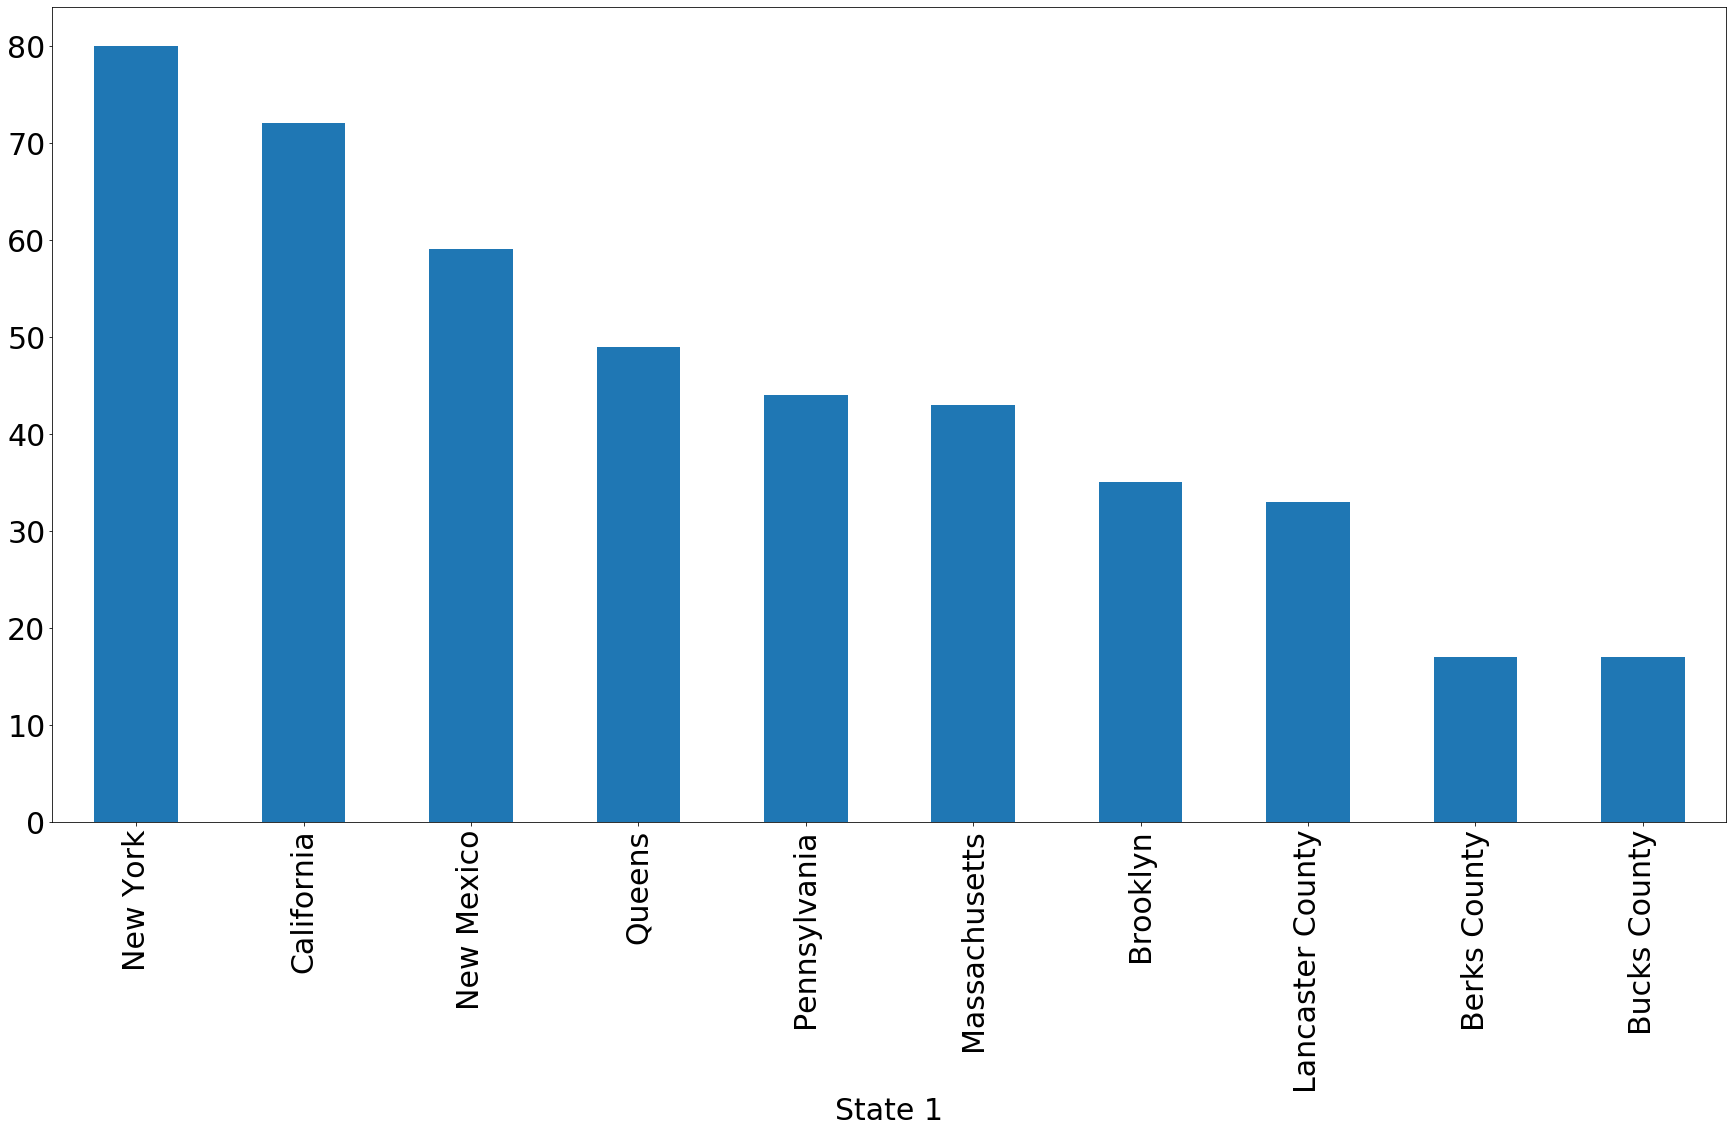

In [63]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False)[2:].head(10).plot.bar()

### Origin of Nations 

In [36]:
museum_df.loc[:,('Country 1')] = museum_df['Country 1'].fillna('N/A')
museum_df[museum_df['Country 1'] == "Côte d'Ivoire"] ="Cote d'Ivoire"
museum_group = museum_df.groupby("Country 1").size().sort_values(ascending=False).head(30).to_frame(name='Count')
museum_group

,Count
Country 1,
N/A,400557
Egypt,33324
United States,19298
Iran,6697
Peru,3431
France,2186
Mexico,1568
United Kingdom,1471
Indonesia,1441


In [37]:
museum_population = pd.merge(museum_group, population_df, how='left', left_index=True, right_on='CountryName')
museum_population = museum_population[['CountryName','Count', 'Population']]
museum_population.reset_index(drop=True, inplace=True)
for index,row in museum_population.iterrows():  # fillin the unmatched countries
    if pd.isnull(row['Population']) == True:
        name = row['CountryName']
        if name != "N/A":
            full_name = population_df[population_df['CountryName'].str.contains(name)]
            population = population_df[population_df['CountryName'].str.contains(name)]
            museum_population.loc[index,['CountryName']] = full_name['CountryName'].iloc[0]
            museum_population.loc[index,['Population']]= population['Population'].iloc[0]

Let's calculate the correlation (excluding the N/A value)

In [38]:
museum_population = museum_population[1:]
museum_population[['Count','Population']].corr('spearman')

,Count,Population
Count,1.000000,0.599507
Population,0.599507,1.000000


Maybe some relationship between the count of the objects from a certain culture and the population of that culture

In [39]:
df = pd.merge(museum_population, ethnicity_df, how='left', left_on='CountryName', right_on='Country')
df = df[df['Country'].notnull()]
df[['Count','Population_y']].corr('spearman')

,Count,Population_y
Count,1.000000,0.216667
Population_y,0.216667,1.000000


No apparent relationship between the count of the objects from a certain culture and the population of that culture ethnic group in U.S

We have to say the analysis is not percise, because the large number of N/As in both Country and Ethnicity colunms.

In [40]:
museum_population = pd.merge(museum_group, population_df, how='left', left_index=True, right_on='CountryName')
museum_population = museum_population[['CountryName','Count', 'Population']]
museum_population.reset_index(drop=True, inplace=True)
for index,row in museum_population.iterrows():  # fillin the unmatched countries
    if pd.isnull(row['Population']) == True:
        name = row['CountryName']
        if name != "N/A":
            full_name = population_df[population_df['CountryName'].str.contains(name)]
            population = population_df[population_df['CountryName'].str.contains(name)]
            museum_population.loc[index,['CountryName']] = full_name['CountryName'].iloc[0]
            museum_population.loc[index,['Population']]= population['Population'].iloc[0]

Let's calculate the correlation (excluding the N/A value)

In [41]:
museum_population = museum_population[1:]
museum_population[['Count','Population']].corr('spearman')

,Count,Population
Count,1.000000,0.599507
Population,0.599507,1.000000


Maybe some relationship between the count of the objects from a certain culture and the population of that culture

In [42]:
df = pd.merge(museum_population, ethnicity_df, how='left', left_on='CountryName', right_on='Country')
df = df[df['Country'].notnull()]
df[['Count','Population_y']].corr('spearman')

,Count,Population_y
Count,1.000000,0.216667
Population_y,0.216667,1.000000


No apparent relationship between the count of the objects from a certain culture and the population of that culture ethnic group in U.S

We have to say the analysis is not percise, because the large number of N/As in both Country and Ethnicity colunms.

In [43]:
museum_population = pd.merge(museum_group, population_df, how='left', left_index=True, right_on='CountryName')
museum_population = museum_population[['CountryName','Count', 'Population']]
museum_population.reset_index(drop=True, inplace=True)
for index,row in museum_population.iterrows():  # fillin the unmatched countries
    if pd.isnull(row['Population']) == True:
        name = row['CountryName']
        if name != "N/A":
            full_name = population_df[population_df['CountryName'].str.contains(name)]
            population = population_df[population_df['CountryName'].str.contains(name)]
            museum_population.loc[index,['CountryName']] = full_name['CountryName'].iloc[0]
            museum_population.loc[index,['Population']]= population['Population'].iloc[0]

Let's calculate the correlation (excluding the N/A value)

In [44]:
museum_population = museum_population[1:]
museum_population[['Count','Population']].corr('spearman')

,Count,Population
Count,1.000000,0.599507
Population,0.599507,1.000000


Maybe some relationship between the count of the objects from a certain culture and the population of that culture

In [45]:
df = pd.merge(museum_population, ethnicity_df, how='left', left_on='CountryName', right_on='Country')
df = df[df['Country'].notnull()]
df[['Count','Population_y']].corr('spearman')

,Count,Population_y
Count,1.000000,0.216667
Population_y,0.216667,1.000000


No apparent relationship between the count of the objects from a certain culture and the population of that culture ethnic group in U.S

We have to say the analysis is not percise, because the large number of N/As in both Country and Ethnicity colunms.

In [46]:
museum_population = pd.merge(museum_group, population_df, how='left', left_index=True, right_on='CountryName')
museum_population = museum_population[['CountryName','Count', 'Population']]
museum_population.reset_index(drop=True, inplace=True)
for index,row in museum_population.iterrows():  # fillin the unmatched countries
    if pd.isnull(row['Population']) == True:
        name = row['CountryName']
        if name != "N/A":
            full_name = population_df[population_df['CountryName'].str.contains(name)]
            population = population_df[population_df['CountryName'].str.contains(name)]
            museum_population.loc[index,['CountryName']] = full_name['CountryName'].iloc[0]
            museum_population.loc[index,['Population']]= population['Population'].iloc[0]

Let's calculate the correlation (excluding the N/A value)

In [47]:
museum_population = museum_population[1:]
museum_population[['Count','Population']].corr('spearman')

,Count,Population
Count,1.000000,0.599507
Population,0.599507,1.000000


Maybe some relationship between the count of the objects from a certain culture and the population of that culture

In [48]:
df = pd.merge(museum_population, ethnicity_df, how='left', left_on='CountryName', right_on='Country')
df = df[df['Country'].notnull()]
df[['Count','Population_y']].corr('spearman')

,Count,Population_y
Count,1.000000,0.216667
Population_y,0.216667,1.000000


No apparent relationship between the count of the objects from a certain culture and the population of that culture ethnic group in U.S

We have to say the analysis is not percise, because the large number of N/As in both Country and Ethnicity colunms.

## Analysis 2: Distribution of artifacts by time

# Basic year inspection before analysis:


## (1) How many rows in all in thie file? 

486732

## (2) How many rows do not have year value (nan)?

2390

## (3) How many unique year values are there (exclude nan value)?
2044

## (4) What is the year range?
from year 400000 BC to 2020 AD.

In [49]:
object_year_df = pd.read_csv ("museum.csv" ,usecols = ["ObjectID","ObjectBeginDate"])


In [50]:
object_year_df.shape

(485632, 2)

In [51]:
# How many cells do not have year information?
object_year_df["ObjectBeginDate"].isnull().sum()

2390

In [52]:
object_year_df = object_year_df.dropna(subset = ["ObjectBeginDate"]).astype(np.int64)

In [53]:
object_year_df.shape

(483242, 2)

In [54]:
object_year_df["ObjectBeginDate"].unique()
len(object_year_df["ObjectBeginDate"].unique())

2044

In [55]:
# object_year_df.groupby("ObjectBeginDate").size()

In [56]:
# Drop two rows the object year is "5000"
object_year_df = object_year_df[object_year_df["ObjectBeginDate"]!=5000]
object_year_df.shape

(483240, 2)

In [57]:
def year_zero_division(object_year)->dict:
    year_inspection = {}
    number_of_objects_bc = object_year[object_year["ObjectBeginDate"]<0].shape[0]
    number_of_object_year_zero = object_year[object_year["ObjectBeginDate"]==0].shape[0]
    number_of_object_ad = object_year[object_year["ObjectBeginDate"]>0].shape[0]
    year_inspection["BC"]=number_of_objects_bc
    year_inspection["Year Zero"] = number_of_object_year_zero
    year_inspection["AD"]=number_of_object_ad
    
    return (year_inspection)
    

    

    

# (5) How many objects were created before year zero (before Christ (BC)), in the year zero, and after year zero (anno Domini (AD))?

In [58]:
year_zero_division_all = year_zero_division(object_year_df)

# Brief summary:
## 66671 objects were created before BC, year value range from year -400000 to year -1
## 415316 object were created after year Zero, year value range from year 1 to year 2020.
## Though small amount of objects were created before Year Zero, the year values have a wide range (-400000,-1).
## There are a huge amount of objects were created after Year Zero (# 415316), however, the year values cover from year 1 to year 2020 only.

In [59]:
plt.rcParams['figure.figsize']=(30,15)
plt.rcParams.update({'font.size': 30})

In [60]:
year_inspection_pd = pd.DataFrame.from_dict(data = year_zero_division,orient = "index", columns = ["object number"])
year_inspection_pd.index.name = "year range"
year_inspection_pd
year_inspection_pd.plot.bar(y="object number")

TypeError: object of type 'function' has no len()

In [ ]:
number_unique_year_bc = len(object_year_df[object_year_df["ObjectBeginDate"]<0]["ObjectBeginDate"].unique())
number_unique_year_ad = len(object_year_df[object_year_df["ObjectBeginDate"]>0]["ObjectBeginDate"].unique())
number_unique_year_ad

In [ ]:
object_year_before_zero_df=object_year_df[object_year_df["ObjectBeginDate"]<0]
# object_year_before_zero_df

object_year_before_zero_list = object_year_before_zero_df["ObjectBeginDate"].tolist()
len(object_year_before_zero_list)


# This is a function categorize the year values which are smaller than 0.
## Years that are before year zero are further categorized into 5 types:
## (1) before 10,000BC
## (2) 10,000 BC - 7500BC
## (3) 7500 BC - 5000BC
## (4) 5000 BC - 2500 BC
## (5) 2500 BC - 0

In [ ]:
def categorize_bc_years(bc_year:list)->dict:
    bc_categories_dic = {"1": (-400000,-10000),
        "2": (-10000,-7500),
        "3": (-7500,-5000),
        "4": (-5000,-2500),
        "5": (-2500,0)}
    a=[]# -400000,-10000
    b=[]# -10000,750
    c=[]# -7500,-5000
    d=[]# -5000,-2500
    e=[]# -2500,0
    bc_category_distribution = {}
    
    for object_year in bc_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            bc_category_distribution["before 10000BC"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            bc_category_distribution["10000BC to 7500BC"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            bc_category_distribution["7500BC to 5000BC"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            bc_category_distribution["5000BC to 2500BC"] = len(d)
        
        else:
            e.append(object_year)
            bc_category_distribution["2500BC to Year 0"] = len(e)

    return(bc_category_distribution)

In [ ]:
# Source: https://stackoverflow.com/questions/52139110/how-to-change-the-order-of-keys-in-a-python-3-5-dictionary-using-another-list-a
# I convert the code from the source website to a function
def change_key_order (key_order:list,year:dict)->dict:
    year_sorted = {k : year[k] for k in key_order}
    return year_sorted
    

In [ ]:
bc_year_dictionary = categorize_bc_years(object_year_before_zero_list)
bc_year_dictionary

In [ ]:
key_order_bc =["before 10000BC","10000BC to 7500BC","7500BC to 5000BC","5000BC to 2500BC","2500BC to Year 0"]
bc_year_dictionary_sorted = change_key_order(key_order_bc,bc_year_dictionary)

In [ ]:
distribution_df = pd.DataFrame.from_dict(bc_year_dictionary_sorted,
                                              orient='index',
                                              columns = ["object number"])

In [ ]:
distribution_df.index.name = "year range"

distribution_df.plot(y="object number")

In [ ]:
distribution_df.plot.bar(y="object number")

# From the above two graphs, we can see that for those objects which were created before year zero as well as collected by museums, most of them were created between 2500 BC and year Zero. 

In [ ]:
object_year_after_zero_df=object_year_df[object_year_df["ObjectBeginDate"]>0]
# object_year_after_zero_df

# This is a function convert year value to century value.

In [ ]:
def year_to_century(year:list) ->list:
    century = []
    for year_value in year:
        if year_value > 0:
            century_value = int(year_value/100)+1
            century.append(century_value)
        elif year_value == 0:
            
            century_value = 0
            century.append(century_value)
        else:
            century_value = int(year_value/100)-1
            century.append(century_value)
    return(century)

In [ ]:
object_year_after_zero_list = object_year_after_zero_df["ObjectBeginDate"].tolist()

In [ ]:
len(object_year_after_zero_list)

In [ ]:
object_century_after_zero_list = year_to_century(object_year_after_zero_list)
# object_century_after_zero_list

In [ ]:
#Source: https://stackoverflow.com/questions/20665232/how-to-plot-the-number-of-times-each-element-is-in-a-list
counts_after_zero = Counter(object_century_after_zero_list)

In [ ]:
counts_after_zero

In [ ]:
import collections
# Source: https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
counts_after_zero_sorted = collections.OrderedDict(sorted(counts_after_zero.items()))
counts_after_zero_sorted

In [ ]:
ad_century_distribution_df = pd.DataFrame.from_dict(counts_after_zero_sorted,orient='index',
                                              columns = ["object number"])
ad_century_distribution_df.index.name = "century"

In [ ]:
century_percent_list = []
for object_number_by_century in counts_after_zero_sorted.values():
    
    object_percent = object_number_by_century/415316*100
    
    century_percent_list.append(object_percent)
print(century_percent_list)

In [ ]:
ad_century_distribution_df["object_percent"]=century_percent_list

In [ ]:
ad_century_distribution_df

In [ ]:
ad_century_distribution_df.plot.bar(y="object number",title = "object number by century")

In [ ]:
ad_century_distribution_df.plot.pie(y="object_percent",title = "object number by century")

In [ ]:
object_year_df.head

## How many objects are created after (including) 19th century?
249094

In [ ]:
object_year_df.head()
object_after_19century_df = object_year_df [object_year_df["ObjectBeginDate"] > 1799]
object_after_19century_df.shape

## This is a functin which convert the year to five categories:
## 1800-1850
## 1850-1900
## 1900-1950
## 1950-2000
## 2000-2050

In [ ]:
def categorize_year_half_century (ad_year:list)->dict:
    bc_categories_dic = {"1": (1800,1850),
        "2": (1850,1900),
        "3": (1900,1950),
        "4": (1950,2000),
        "5": (2000,2050)}
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    
    half_century_category_distribution = {}
    
    for object_year in ad_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            half_century_category_distribution["1800-1850"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            half_century_category_distribution["1850-1900"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            half_century_category_distribution["1900-1950"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            half_century_category_distribution["1950-2000"] = len(d)
        
        else:
            e.append(object_year)
            half_century_category_distribution["2000-2050"] = len(e)

    return(half_century_category_distribution)

In [ ]:
object_after_19century_list = object_after_19century_df["ObjectBeginDate"].tolist()
len(object_after_19century_list)

In [ ]:
categorize_year_half_century_dic = categorize_year_half_century (object_after_19century_list)

In [ ]:
order = ["1850-1900","1900-1950","1950-2000","2000-2050"]
categorize_year_half_century_dic = change_key_order (order,categorize_year_half_century_dic)

In [ ]:
categorize_year_half_century_df = pd.DataFrame.from_dict(categorize_year_half_century_dic,orient="index",columns=["object number"])
categorize_year_half_century_df.index.name="year category"
categorize_year_half_century_df.head()

In [ ]:
categorize_year_half_century_df.plot.bar(y="object number",title = "object (after 19th century) number every half century")


In [ ]:
def categorize_year_qurter_century (ad_year:list)->dict:
    bc_categories_dic = {"1": (1800,1825),
        "2": (1825,1850),
        "3": (1850,1875),
        "4": (1875,1900),
        "5": (1900,1925),
        "6": (1925,1950),
        "7": (1950,1975),
        "8": (1975,2000),
        "9": (2000,2020)                 
                        }
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    f=[]
    g=[]
    h=[]
    i=[]
    
    category_distribution = {}
    
    for object_year in ad_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            category_distribution["1800-1825"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            category_distribution["1825-1850"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            category_distribution["1850-1875"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            category_distribution["1875-1900"] = len(d)
        
        elif object_year in range(bc_categories_dic["5"][0],bc_categories_dic["5"][1]):
            e.append(object_year)
            category_distribution["1900-1925"] = len(e)
            
        elif object_year in range(bc_categories_dic["6"][0],bc_categories_dic["6"][1]):
            f.append(object_year)
            category_distribution["1925-1950"] = len(f)
            
        elif object_year in range(bc_categories_dic["7"][0],bc_categories_dic["7"][1]):
            g.append(object_year)
            category_distribution["1950-1975"] = len(f)
            
        elif object_year in range(bc_categories_dic["8"][0],bc_categories_dic["8"][1]):
            h.append(object_year)
            category_distribution["1975-2000"] = len(h)
        else:
            i.append(object_year)
            category_distribution["2000-2020"] = len(i)
    return(category_distribution)

In [ ]:
categorize_year_quarter_century_dic = categorize_year_qurter_century (object_after_19century_list)
categorize_year_quarter_century_dic 

In [ ]:
key_order_qurter = ["1800-1825","1825-1850","1850-1875","1875-1900","1900-1925","1925-1950","1950-1975","1975-2000","2000-2020"]

In [ ]:
categorize_year_half_century_dic = change_key_order (key_order_qurter,categorize_year_quarter_century_dic)

In [ ]:
categorize_year_half_century_df = pd.DataFrame.from_dict(categorize_year_half_century_dic,orient="index",columns=["object number"])
categorize_year_half_century_df.index.name="year category"
categorize_year_half_century_df.plot.bar(y="object number",title = "object (after 19th century) number every half century")


In [ ]:
museum_df.head()
museum_year_country = museum_df[["ObjectBeginDate","Country 1"]]
museum_year_country.shape

## Since there are many objects from Egypt. We did a year analysis on the created year values of objected originated from Egypt.

In [ ]:
museum_year_country_drop_nan = museum_year_country.dropna(how = "any", subset=["ObjectBeginDate","Country 1"])
museum_year_country_drop_nan.head()

In [ ]:
museum_egypt_year =museum_year_country_drop_nan.loc[museum_year_country['Country 1'] == "Egypt"]


museum_egypt_year.shape

In [ ]:
museum_egypt_year = museum_egypt_year.astype({"ObjectBeginDate": np.int64})
museum_egypt_year.head()

In [ ]:
museum_egypt_year["ObjectBeginDate"]

In [ ]:
egypt_year_zero_division = year_zero_division(museum_egypt_year)
egypt_year_zero_division 

In [ ]:
egypt_year_inspection_pd = pd.DataFrame.from_dict(egypt_year_zero_division,orient = "index", columns = ["object number"])
egypt_year_inspection_pd.index.name = "year range"
egypt_year_inspection_pd.plot.bar(y="object number")

In [ ]:
egypt = []
for number in egypt_year_zero_division.values():
    
    object_percent = number/33324*100
    
    egypt.append(object_percent)
print(egypt)

In [ ]:
egypt_year_inspection_pd["percent"] = egypt
egypt_year_inspection_pd.plot.pie(y="percent")

In [ ]:
museum_china_year = museum_year_country.loc[museum_year_country['Country 1'] == "China"]
museum_china_year_dropnan = museum_china_year.dropna(how = "any",subset = ["ObjectBeginDate","Country 1"])
museum_china_year_dropnan= museum_china_year_dropnan.astype({"ObjectBeginDate": np.int64})
museum_china_year_dropnan.shape

In [ ]:
china_year_zero_division = year_zero_division(museum_china_year_dropnan)
china_year_zero_division

In [ ]:
china_year_inspection_pd = pd.DataFrame.from_dict(china_year_zero_division,orient = "index", columns = ["object number"])
china_year_inspection_pd.index.name = "year range"

In [ ]:
china = []
for year in china_year_zero_division.values():
    
    object_percent = year/948*100
    
    china.append(object_percent)
print(china)

In [ ]:
china_year_inspection_pd["percent"] = china
china_year_inspection_pd.plot.pie(y="percent")